# Project: Titanic - Machine Learning from Disaster

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test_df = pd.read_csv('test.csv',index_col='PassengerId')
train_df = pd.read_csv('train.csv',index_col='PassengerId')

In [5]:
train_df.columns, test_df.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

In [6]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [10]:
train_df['Survived'] = train_df['Survived'].astype('category')
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    int64   
 2   Name      891 non-null    object  
 3   Sex       891 non-null    object  
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    object  
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 77.6+ KB


In [11]:
features = ['Pclass','Sex','SibSp','Parch','Embarked']
def convert_cat(df, features):
    for ft in features:
        df[ft] = df[ft].astype('category')

convert_cat(train_df, features)   
convert_cat(test_df, features) 
    

In [12]:
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    category
 6   Parch     891 non-null    category
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Cabin     204 non-null    object  
 10  Embarked  889 non-null    category
dtypes: category(6), float64(2), object(3)
memory usage: 48.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Name      418 non-null    object  
 2   Sex       418 non-null    category
 3   Age   

(None, None)

### Distribution of numerical feature values across the samples

In [13]:
train_df.describe(),test_df.describe()

(              Age        Fare
 count  714.000000  891.000000
 mean    29.699118   32.204208
 std     14.526497   49.693429
 min      0.420000    0.000000
 25%     20.125000    7.910400
 50%     28.000000   14.454200
 75%     38.000000   31.000000
 max     80.000000  512.329200,
               Age        Fare
 count  332.000000  417.000000
 mean    30.272590   35.627188
 std     14.181209   55.907576
 min      0.170000    0.000000
 25%     21.000000    7.895800
 50%     27.000000   14.454200
 75%     39.000000   31.500000
 max     76.000000  512.329200)

### Distribution of categorical features

In [14]:
train_df.describe(include=['category']),test_df.describe(include=['category'])

(        Survived  Pclass   Sex  SibSp  Parch Embarked
 count        891     891   891    891    891      889
 unique         2       3     2      7      7        3
 top            0       3  male      0      0        S
 freq         549     491   577    608    678      644,
         Pclass   Sex  SibSp  Parch Embarked
 count      418   418    418    418      418
 unique       3     2      7      8        3
 top          3  male      0      0        S
 freq       218   266    283    324      270)

### Exploratory Data Analysis (EDA)

In [15]:
train_df['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [16]:
train_df['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


In [17]:
train_df['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


<Axes: xlabel='Sex', ylabel='count'>

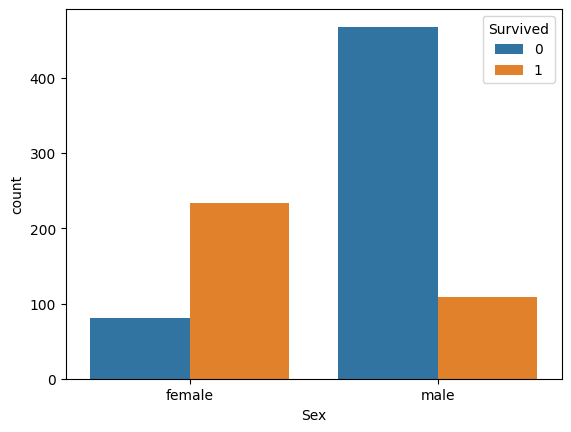

In [18]:
sns.countplot(data=train_df, x = 'Sex',hue='Survived')

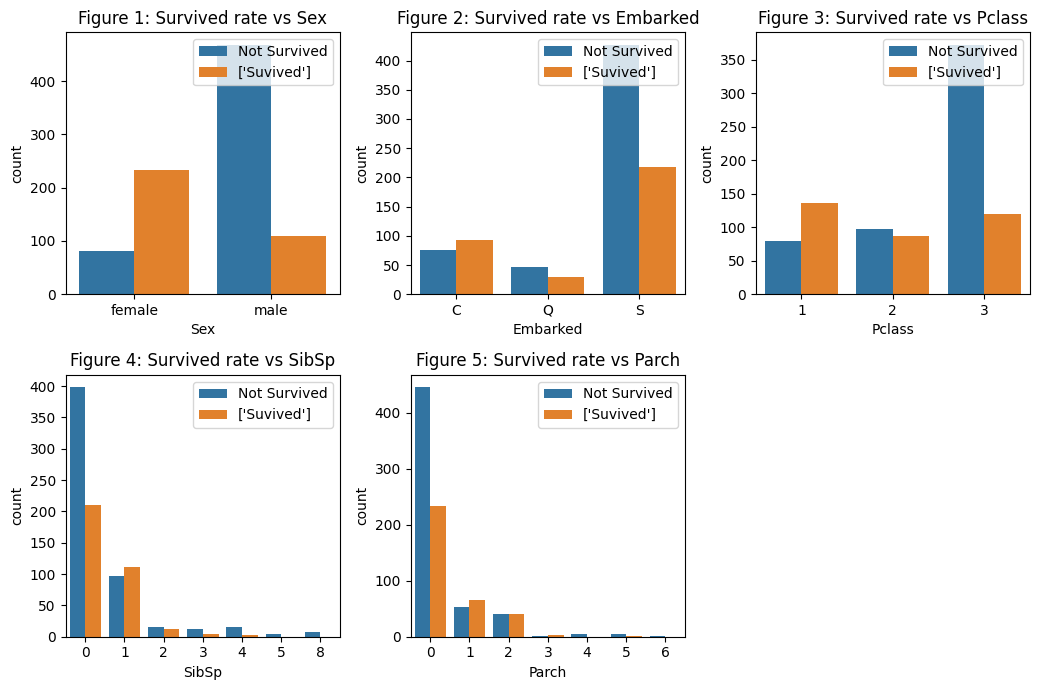

In [19]:
cols = ['Sex','Embarked', 'Pclass', 'SibSp', 'Parch']
n_rows = 2
n_cols = 3

fid,ax = plt.subplots(n_rows, n_cols, figsize = (n_cols*3.5,n_rows*3.5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r*n_cols + c # index to loop through list 'cols'
        if i<len(cols):
            ax_i  = ax[r,c]
            sns.countplot(data=train_df, x=cols[i], hue='Survived', ax = ax_i)
            ax_i.set_title(f'Figure {i+1}: Survived rate vs {cols[i]}')
            ax_i.legend( title='', loc = 'upper right', labels= ['Not Survived', ['Suvived']])
ax.flat[-1].set_visible(False)            
plt.tight_layout()            
plt.show()

### EDA for Numerical Features
#### Age

<Axes: xlabel='Age', ylabel='Count'>

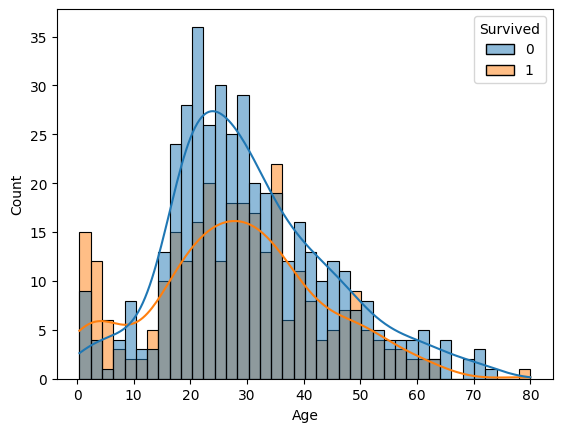

In [20]:
sns.histplot(data=train_df, x='Age',hue='Survived', bins=40, kde=True)

#### Fare

In [21]:
train_df.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


<Axes: xlabel='Fare', ylabel='Count'>

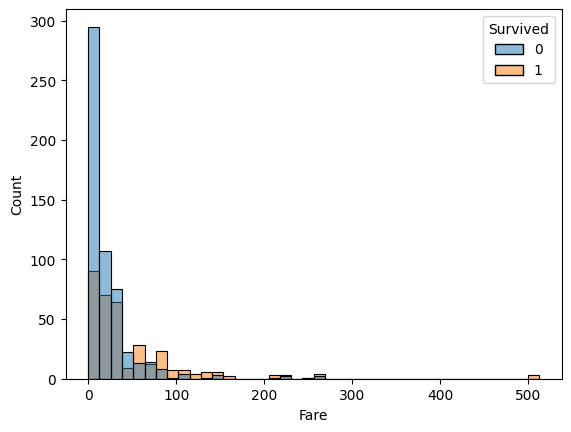

In [22]:
sns.histplot(data=train_df, x ='Fare', hue='Survived', bins=40)

<Axes: xlabel='Fare', ylabel='count'>

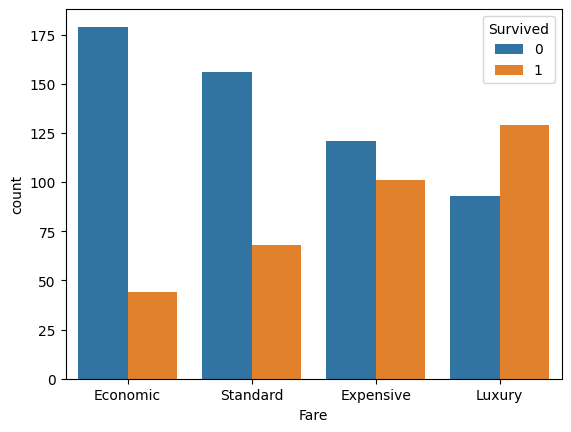

In [23]:
# To name for 0-25%, 25-50, 50-75, 75-100
fare_categories = ['Economic','Standard','Expensive','Luxury']
quartile_data = pd.qcut(train_df['Fare'], 4, labels = fare_categories)
sns.countplot( x=quartile_data, hue=train_df['Survived'])

### Feature Engineering and Data Wrangling
#### Name

In [24]:
train_df['Name'].tail(10)

PassengerId
882                          Markun, Mr. Johann
883                Dahlberg, Miss. Gerda Ulrika
884               Banfield, Mr. Frederick James
885                      Sutehall, Mr. Henry Jr
886        Rice, Mrs. William (Margaret Norton)
887                       Montvila, Rev. Juozas
888                Graham, Miss. Margaret Edith
889    Johnston, Miss. Catherine Helen "Carrie"
890                       Behr, Mr. Karl Howell
891                         Dooley, Mr. Patrick
Name: Name, dtype: object

In [25]:
import re
def extract_title(name):
    p = re.compile(r",([\w\s]+)\.")
    return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))
test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [26]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64

In [27]:
def group_title(Title):
    if Title in ['Mr','Mrs','Miss','Master']:
        return Title
    elif Title == 'Ms':
        return 'Miss'
    else:
        return 'Other'

train_df['Title'] = train_df['Title'].apply(lambda Title: group_title(Title))
test_df['Title'] = test_df['Title'].apply(lambda Title: group_title(Title))

In [28]:
test_df['Title'].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

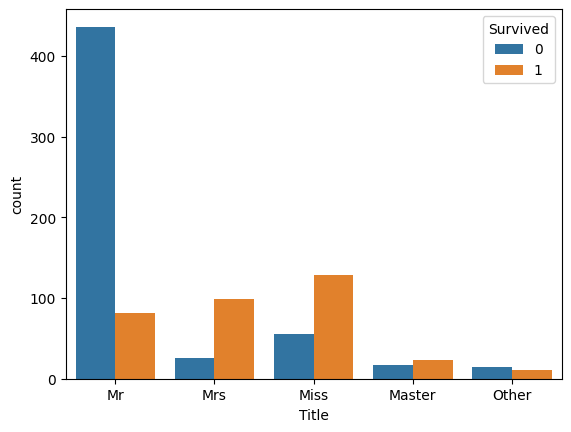

In [29]:
sns.countplot(data=train_df, x = 'Title', hue='Survived')

### Family

In [30]:
train_df['Family_size'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1
test_df['Family_size'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1

In [31]:
train_df['Family_cat'] = pd.cut(train_df['Family_size'], bins=(0,1,4,6,20), labels=['Solo','Small','Medium','Large'])
test_df['Family_cat'] = pd.cut(test_df['Family_size'], bins=(0,1,4,6,20), labels=['Solo','Small','Medium','Large'])

<Axes: xlabel='Family_cat', ylabel='count'>

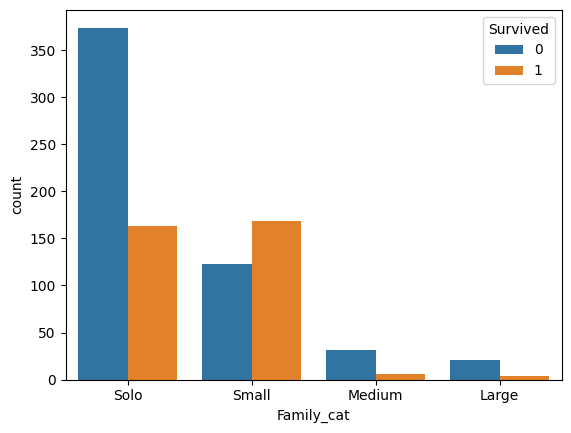

In [32]:
sns.countplot(data=train_df, x='Family_cat', hue='Survived')

# Data Wrangling

In [33]:
num_features = ['Age','Fare']
cat_features = ['Sex','Pclass','Embarked','Title','Family_cat']
features_cols = num_features + cat_features
print(features_cols)

['Age', 'Fare', 'Sex', 'Pclass', 'Embarked', 'Title', 'Family_cat']


In [34]:
def display_missing(df, features_cols):
    for col in features_cols:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            print(f'col {col} has {missing_count} missing values')

display_missing(train_df,features_cols)
display_missing(test_df, features_cols)

col Age has 177 missing values
col Embarked has 2 missing values
col Age has 86 missing values
col Fare has 1 missing values


## Fill the missing values
### Age

In [35]:
average_value = train_df['Age'].mean()
train_df['Age'].fillna(average_value, inplace=True)

C:\Users\QUI\AppData\Local\Temp\ipykernel_21176\1061296017.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(average_value, inplace=True)


In [53]:
average_value = test_df['Age'].mean()
test_df['Age'].fillna(average_value, inplace=True)

C:\Users\QUI\AppData\Local\Temp\ipykernel_21176\2572959255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(average_value, inplace=True)


In [36]:
display_missing(train_df,features_cols)

col Embarked has 2 missing values


In [57]:
average_value = test_df['Age'].mean()
test_df['Age'].fillna(average_value, inplace=True)

C:\Users\QUI\AppData\Local\Temp\ipykernel_21176\2572959255.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Age'].fillna(average_value, inplace=True)


In [59]:
average_value = test_df['Fare'].mean()
test_df['Fare'].fillna(average_value, inplace=True)

C:\Users\QUI\AppData\Local\Temp\ipykernel_21176\3001036705.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(average_value, inplace=True)


In [60]:
display_missing(test_df, features_cols)

In [39]:
x = train_df[features_cols]
y = train_df['Survived']
x_test = test_df[features_cols]

In [40]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [41]:
num_tranformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_tranformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [42]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_tranformer, num_features),
    ('cat',cat_tranformer,cat_features)
])

In [43]:
preprocessor.fit(x)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Pclass', 'Embarked', 'Title',
                                  'Family_cat'])])

In [44]:
x = preprocessor.transform(x)

In [45]:

x_test = preprocessor.transform(x_test)

## Model Training

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2)

In [48]:
x_train.shape, x_val.shape, x_test.shape

((712, 19), (179, 19), (418, 19))

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score, classification_report,confusion_matrix

In [50]:
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [61]:
log_reg.score(x_val,y_val)

0.8491620111731844

In [66]:
y_pre = log_reg.predict(x_test)

In [1]:
Prediction = pd.DataFrame(y_pre)

NameError: name 'pd' is not defined

### Nâng bậc mô hình

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
poly_features_x_train = poly.fit_transform(x_train)
poly_features_x_val = poly.transform(x_val)

In [ ]:
poly_log_reg = LogisticRegression(solver='liblinear', max_iter=1000)
poly_log_reg.fit(poly_features_x_train,y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [ ]:
poly_log_reg.score(poly_features_x_val,y_val)

0.8156424581005587

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2024)
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=2024)

In [ ]:
dec_tree.score(x_val,y_val)

0.8324022346368715